In [1]:
cd ../../task_01/pipelines

/Users/mathieuchevalley/Documents/Study/ETHZ/Fall Semester 2020/Data Science lab/data_sc_lab/task_01/pipelines


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipynb.fs.full.tool_functions import *
from yellowbrick.regressor import AlphaSelection

In [6]:
df_x_train = pd.read_csv("../../../data/x_train_latent.csv")
df_x_test = pd.read_csv("../../../data/x_test_latent.csv")
df_beha = pd.read_csv('../../../data/Behavioral/AllData.csv')
srs = pd.read_csv('../../../data/HBN_srs.csv', delimiter=';')
outliers = pd.read_csv('../../../data/outliers.csv')

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (66,68,80,81,82,83,84,95,96,97,98,99,110,111,112,113,114,125,126,127,128,129,140,141,142,144,155,156,157,159,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024,1025,1026,1027,1028,1029,1030,1031,1032,1033,1034,1035,1036,1037,1038,1039,1040,1041,1042,1043,1044,1045,1046,1047,1048,1049,1050,1051,1052,1053,1054,1055,1056,1057,1058,1059,1060,1061,1062,1063,1064,1065,1066,1067,1068,1069,1070,1071,1072,1073,1074,1075,1076,1077,1078,1079,1080,1081,1082,1083,1084,1085,1086,1087,1088,1089,1090,1091,1092,1093,1094,1095,1096,1097,1098,1099,1100,1101,1102,1103

In [7]:
df_x_train = df_x_train[~df_x_train.Patient_ID.isin(outliers.Patient_ID)]
df_x_test = df_x_test[~df_x_test.Patient_ID.isin(outliers.Patient_ID)]

# SRS

In [8]:
srs

,IDs,Sex,Age,SRS_RRB,SRS_SCI,SRS_Total
0,NDARAA075AMK,1,6.728040,1.0,3.0,4.0
1,NDARAA112DMH,0,5.545744,NaN,NaN,NaN
2,NDARAA117NEJ,0,7.475929,8.0,44.0,52.0
3,NDARAA536PTU,0,11.998402,5.0,27.0,32.0
4,NDARAA948VFH,1,7.982660,0.0,18.0,18.0
...,...,...,...,...,...,...
1789,NDARZX163EWC,1,9.898471,2.0,22.0,24.0
1790,NDARZX561DR9,0,5.994296,23.0,68.0,91.0
1791,NDARZY101JNB,0,7.517111,21.0,98.0,119.0
1792,NDARZY668NMV,1,11.623431,10.0,44.0,54.0


In [9]:
srs = srs[~srs['SRS_RRB'].isnull()]

In [11]:
srs.rename(columns={'IDs': 'Patient_ID'}, inplace=True)


/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


In [15]:
df_x_train_srs = pd.merge(srs, df_x_train, on='Patient_ID')
df_x_test_srs = pd.merge(srs, df_x_test, on='Patient_ID')

In [71]:
x_train_srs, y_train_srs = df_x_train_srs.drop(['Age', 'Sex', 'SRS_RRB' , 'SRS_SCI', 'SRS_Total', 'Patient_ID', 'Unnamed: 0'], axis = 1).to_numpy(), df_x_train_srs[['SRS_RRB' , 'SRS_SCI', 'SRS_Total']].to_numpy()
x_test_srs, y_test_srs = df_x_test_srs.drop(['Age', 'Sex', 'SRS_RRB' , 'SRS_SCI', 'SRS_Total', 'Patient_ID', 'Unnamed: 0'], axis = 1).to_numpy(), df_x_test_srs[['SRS_RRB' , 'SRS_SCI', 'SRS_Total']].to_numpy()

In [46]:
y = np.zeros(len(y_test_srs))
y = y + np.mean(y_train_srs[:,0])
sklearn.metrics.mean_squared_error(y, y_test_srs[:,0])

51.064368824868346

In [47]:
y = np.zeros(len(y_test_srs))
y = y + np.mean(y_train_srs[:,1])
sklearn.metrics.mean_squared_error(y, y_test_srs[:,1])

509.24065388807327

In [155]:
from sklearn.linear_model import Lasso, LassoCV
lasso = linear_model.Lasso(alpha=0.05)
lasso.fit(x_train_srs , y_train_srs[:,2])

Lasso(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [156]:
lasso.coef_

array([ 0.56232089,  0.29356098,  1.23881421, -3.98660327,  0.61241272,
        0.        ,  0.90604147,  2.71867012,  0.34897874, -5.6991567 ,
       -1.88569529, -0.        ,  3.54387136,  2.23449325,  2.74127721])

In [157]:
import sklearn
sklearn.metrics.mean_squared_error(y_test_srs[:,2] , lasso.predict(x_test_srs))

833.161316325502

In [114]:
df_x_train_srs.corr()['SRS_RRB']

Sex          -0.144959
Age          -0.073114
SRS_RRB       1.000000
SRS_SCI       0.851083
SRS_Total     0.909735
Unnamed: 0   -0.023061
0             0.018292
1            -0.015137
2            -0.007439
3            -0.088481
4             0.014207
5            -0.057977
6            -0.001767
7             0.020634
8            -0.016302
9            -0.101353
10           -0.051226
11           -0.017220
12            0.029113
13           -0.014410
14            0.063517
Name: SRS_RRB, dtype: float64

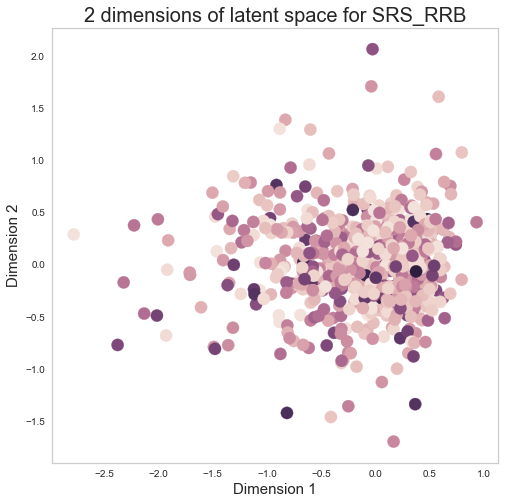

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
y = y_train_srs[:,0]/34.0 

df = pd.DataFrame(data = x_train_srs[:, [3,9]],
                          columns = ['component 1' ,
                                    'component 2'])

labels = pd.DataFrame(y)

finalDf = pd.concat([df, labels] , axis=1)

fig = plt.figure(figsize = (8,8))

ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Dimension 1', fontsize = 15)
ax.set_ylabel('Dimension 2', fontsize = 15)
ax.set_title('2 dimensions of latent space for SRS_RRB', fontsize = 20)


cmap = sns.cubehelix_palette(light=.9, as_cmap=True)
ax.scatter(df['component 1'], df['component 2'], c=y, s=150, cmap=cmap)
#ax.legend(target_val)
ax.grid()

plt.savefig('plot_srs_rrb_beta_vae.png')
plt.show()

In [112]:
df_x_train_srs.corr()['SRS_SCI']

Sex          -0.124291
Age          -0.047152
SRS_RRB       0.909735
SRS_SCI       0.992247
SRS_Total     1.000000
Unnamed: 0   -0.031129
0             0.010255
1            -0.011776
2             0.016899
3            -0.076220
4             0.009664
5            -0.027005
6             0.013780
7             0.033816
8            -0.003952
9            -0.072884
10           -0.025273
11           -0.001348
12            0.048864
13           -0.022998
14            0.079649
Name: SRS_Total, dtype: float64

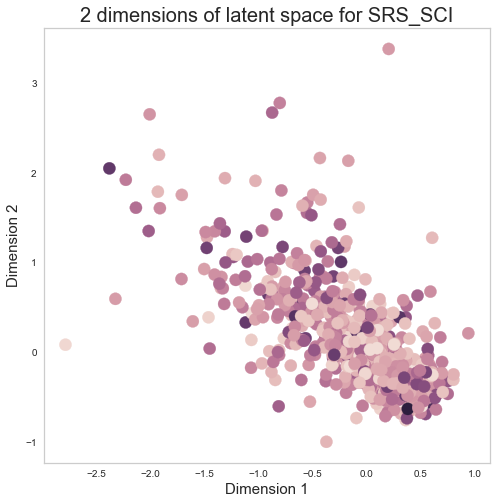

In [74]:
y = y_train_srs[:,1]/np.max(y_train_srs[:,1])

df = pd.DataFrame(data = x_train_srs[:, [3,14]],
                          columns = ['component 1' ,
                                    'component 2'])

labels = pd.DataFrame(y)

finalDf = pd.concat([df, labels] , axis=1)

fig = plt.figure(figsize = (8,8))

ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Dimension 1', fontsize = 15)
ax.set_ylabel('Dimension 2', fontsize = 15)
ax.set_title('2 dimensions of latent space for SRS_SCI', fontsize = 20)


cmap = sns.cubehelix_palette(light=.9, as_cmap=True)
ax.scatter(df['component 1'], df['component 2'], c=y, s=150, cmap=cmap)
#ax.legend(target_val)
ax.grid()

plt.savefig('plot_srs_sci_beta_vae.png')
plt.show()

In [73]:
df_x_train_srs.corr()['SRS_Total']

Sex          -0.124291
Age          -0.047152
SRS_RRB       0.909735
SRS_SCI       0.992247
SRS_Total     1.000000
Unnamed: 0   -0.031129
0             0.010255
1            -0.011776
2             0.016899
3            -0.076220
4             0.009664
5            -0.027005
6             0.013780
7             0.033816
8            -0.003952
9            -0.072884
10           -0.025273
11           -0.001348
12            0.048864
13           -0.022998
14            0.079649
Name: SRS_Total, dtype: float64

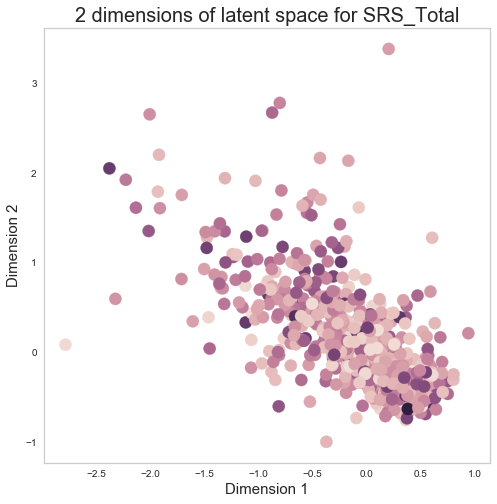

In [75]:
y = y_train_srs[:,2]/np.max(y_train_srs[:,2])

df = pd.DataFrame(data = x_train_srs[:, [3,14]],
                          columns = ['component 1' ,
                                    'component 2'])

labels = pd.DataFrame(y)

finalDf = pd.concat([df, labels] , axis=1)

fig = plt.figure(figsize = (8,8))

ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Dimension 1', fontsize = 15)
ax.set_ylabel('Dimension 2', fontsize = 15)
ax.set_title('2 dimensions of latent space for SRS_Total', fontsize = 20)


cmap = sns.cubehelix_palette(light=.9, as_cmap=True)
ax.scatter(df['component 1'], df['component 2'], c=y, s=150, cmap=cmap)
#ax.legend(target_val)
ax.grid()

plt.savefig('plot_srs_total_beta_vae.png')
plt.show()

In [140]:
from sklearn import svm
svr= svm.SVR()
parameters = {'kernel' : ( 'rbf' , 'sigmoid' ), 'C':[0.1, 1,10,100], 'gamma':['auto']}
clf = GridSearchCV(svr, parameters ,cv =5, scoring='neg_mean_squared_error')
#x = np.hstack((encoded_imgs, y_train[:,0].reshape((-1, 1))))
clf.fit(x_train_srs , y_train_srs[:,0])

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['auto'],
                         'kernel': ('rbf', 'sigmoid')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [141]:
clf.best_score_

-62.685103697256764

In [142]:
sklearn.metrics.mean_squared_error(y_test_srs[:,0] , clf.predict(x_test_srs))

51.57692551507282

In [143]:
y = np.zeros(len(y_test_srs))
y = y + np.mean(y_train_srs[:,0])
sklearn.metrics.mean_squared_error(y, y_test_srs[:,0])

51.064368824868346

In [144]:
from sklearn import svm
svr= svm.SVR()
parameters = {'kernel' : ( 'rbf' , 'sigmoid' ), 'C':[0.1, 1,10,100], 'gamma':['auto']}
clf = GridSearchCV(svr, parameters ,cv =5, scoring='neg_mean_squared_error')
#x = np.hstack((encoded_imgs, y_train[:,0].reshape((-1, 1))))
clf.fit(x_train_srs , y_train_srs[:,1])

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['auto'],
                         'kernel': ('rbf', 'sigmoid')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [145]:
clf.best_score_

-671.4740704671851

In [146]:
sklearn.metrics.mean_squared_error(y_test_srs[:,1] , clf.predict(x_test_srs))

501.99272094345724

In [147]:
y = np.zeros(len(y_test_srs))
y = y + np.mean(y_train_srs[:,1])
sklearn.metrics.mean_squared_error(y, y_test_srs[:,1])

509.24065388807327

In [148]:
from sklearn import svm
svr= svm.SVR()
parameters = {'kernel' : ( 'rbf' , 'sigmoid' ), 'C':[0.1, 1,10,100], 'gamma':['auto']}
clf = GridSearchCV(svr, parameters ,cv =5, scoring='neg_mean_squared_error')
#x = np.hstack((encoded_imgs, y_train[:,0].reshape((-1, 1))))
clf.fit(x_train_srs , y_train_srs[:,2])

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['auto'],
                         'kernel': ('rbf', 'sigmoid')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [149]:
clf.best_score_

-1089.179297327083

In [150]:
sklearn.metrics.mean_squared_error(y_test_srs[:,2] , clf.predict(x_test_srs))

819.9007612445095

In [151]:
y = np.zeros(len(y_test_srs))
y = y + np.mean(y_train_srs[:,2])
sklearn.metrics.mean_squared_error(y, y_test_srs[:,2])

834.0832530366092

In [158]:
def fit_xgboost_with_grid_search(X_train, y_train):

    # Create gradient boosting object
    xgbr = XGBRegressor(verbosity=1, max_depth=10, reg_lambda=1) 
    
    # Grid search 
    parameters = {'max_depth':[1,2,4], 'reg_lambda':[4, 6, 8, 10, 12, 14, 16, 18, 20], 'min_child_weight':[6, 8, 12,16, 20, 25, 30]}
    clf = GridSearchCV(xgbr, parameters, scoring='neg_mean_squared_error', n_jobs=4, iid=False, cv=5)
    clf.fit(X_train, y_train)
    
    print("Best parameters for XGBoost: " + str(clf.best_params_))
            
    return clf

In [159]:
xgb = fit_xgboost_with_grid_search(x_train_srs , y_train_srs[:,2])

Best parameters for XGBoost: {'max_depth': 1, 'min_child_weight': 16, 'reg_lambda': 20}


In [160]:
xgb.best_score_

-1094.4162762136011

In [161]:
sklearn.metrics.mean_squared_error(y_test_srs[:,2] , xgb.predict(x_test_srs))

881.6196451553358

# SWAN

In [133]:
s = df_beha[['Patient_ID', 'SWAN_IN_Avg', 'SWAN_HY_Avg', 'Age', 'Sex']]

In [134]:
s = s[~s['SWAN_IN_Avg'].isnull()]

In [136]:
df_x_train_swan = pd.merge(s, df_x_train, on='Patient_ID')
df_x_test_swan = pd.merge(s, df_x_test, on='Patient_ID')

In [137]:
x_train_swan, y_train_swan = df_x_train_swan.drop(['SWAN_IN_Avg', 'SWAN_HY_Avg', 'Patient_ID', 'Unnamed: 0', 'Age', 'Sex'], axis = 1).to_numpy(), df_x_train_swan[['SWAN_IN_Avg', 'SWAN_HY_Avg']].to_numpy()
x_test_swan, y_test_swan = df_x_test_swan.drop(['SWAN_IN_Avg', 'SWAN_HY_Avg', 'Patient_ID', 'Unnamed: 0', 'Age', 'Sex'], axis = 1).to_numpy(), df_x_test_swan[['SWAN_IN_Avg', 'SWAN_HY_Avg']].to_numpy()

In [138]:
df_x_train_swan.corr()['SWAN_IN_Avg']

SWAN_IN_Avg    1.000000
SWAN_HY_Avg    0.594251
Age            0.004655
Sex           -0.213116
Unnamed: 0    -0.053623
0             -0.028256
1             -0.074682
2             -0.013838
3             -0.084031
4              0.026896
5             -0.048788
6              0.005292
7              0.016654
8              0.010487
9             -0.068108
10             0.000322
11             0.016845
12             0.045692
13            -0.070229
14             0.045099
Name: SWAN_IN_Avg, dtype: float64

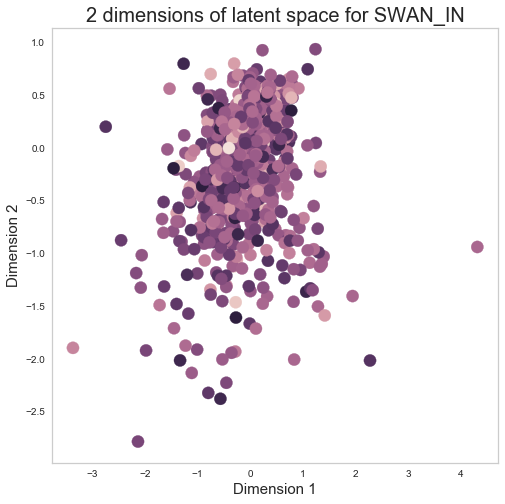

In [79]:
y = y_train_swan[:,0] + 3.0/6.0

df = pd.DataFrame(data = x_train_swan[:, [1,3]],
                          columns = ['component 1' ,
                                    'component 2'])

labels = pd.DataFrame(y)

finalDf = pd.concat([df, labels] , axis=1)

fig = plt.figure(figsize = (8,8))

ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Dimension 1', fontsize = 15)
ax.set_ylabel('Dimension 2', fontsize = 15)
ax.set_title('2 dimensions of latent space for SWAN_IN', fontsize = 20)


cmap = sns.cubehelix_palette(light=.9, as_cmap=True)
ax.scatter(df['component 1'], df['component 2'], c=y, s=150, cmap=cmap)
#ax.legend(target_val)
ax.grid()

plt.savefig('plot_swan_in_beta_vae.png')
plt.show()

In [139]:
df_x_train_swan.corr()['SWAN_HY_Avg']

SWAN_IN_Avg    0.594251
SWAN_HY_Avg    1.000000
Age           -0.291872
Sex           -0.238919
Unnamed: 0    -0.044181
0             -0.084139
1             -0.097556
2              0.004414
3             -0.138474
4              0.019134
5             -0.197148
6              0.014384
7             -0.013001
8              0.012087
9             -0.017495
10            -0.156673
11             0.031668
12             0.049937
13            -0.016861
14             0.098859
Name: SWAN_HY_Avg, dtype: float64

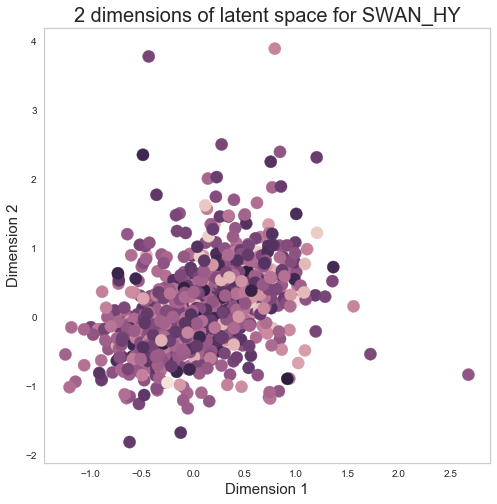

In [81]:
y = y_train_swan[:,0] + 3.0/6.0

df = pd.DataFrame(data = x_train_swan[:, [5,10]],
                          columns = ['component 1' ,
                                    'component 2'])

labels = pd.DataFrame(y)

finalDf = pd.concat([df, labels] , axis=1)

fig = plt.figure(figsize = (8,8))

ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Dimension 1', fontsize = 15)
ax.set_ylabel('Dimension 2', fontsize = 15)
ax.set_title('2 dimensions of latent space for SWAN_HY', fontsize = 20)


cmap = sns.cubehelix_palette(light=.9, as_cmap=True)
ax.scatter(df['component 1'], df['component 2'], c=y, s=150, cmap=cmap)
#ax.legend(target_val)
ax.grid()

plt.savefig('plot_swan_hy_beta_vae.png')
plt.show()

In [84]:
from sklearn import svm
svr= svm.SVR()
parameters = {'kernel' : ( 'rbf' , 'sigmoid' ), 'C':[0.1, 1,10,100], 'gamma':['auto']}
clf = GridSearchCV(svr, parameters ,cv =5, scoring='neg_mean_squared_error')
#x = np.hstack((encoded_imgs, y_train[:,0].reshape((-1, 1))))
clf.fit(x_train_swan , y_train_swan[:,0])

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['auto'],
                         'kernel': ('rbf', 'sigmoid')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [85]:
clf.best_score_

-1.3647325224515598

In [86]:
sklearn.metrics.mean_squared_error(y_test_swan[:,0] , clf.predict(x_test_swan))

1.4564939040160865

In [87]:
y = np.zeros(len(y_test_swan))
y = y + np.mean(y_train_swan[:,0])
sklearn.metrics.mean_squared_error(y, y_test_swan[:,0])

1.4552033563651803

In [88]:
from sklearn import svm
svr= svm.SVR()
parameters = {'kernel' : ( 'rbf' , 'sigmoid' ), 'C':[0.1, 1,10,100], 'gamma':['auto']}
clf = GridSearchCV(svr, parameters ,cv =5, scoring='neg_mean_squared_error')
#x = np.hstack((encoded_imgs, y_train[:,0].reshape((-1, 1))))
clf.fit(x_train_swan , y_train_swan[:,1])

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['auto'],
                         'kernel': ('rbf', 'sigmoid')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [89]:
clf.best_score_

-1.3266925329414598

In [90]:
sklearn.metrics.mean_squared_error(y_test_swan[:,1] , clf.predict(x_test_swan))

1.3335216488080448

In [91]:
y = np.zeros(len(y_test_swan))
y = y + np.mean(y_train_swan[:,1])
sklearn.metrics.mean_squared_error(y, y_test_swan[:,1])

1.3797574914111495

# Age total

In [96]:
age = df_beha[['Age', 'Patient_ID']]
age

,Age,Patient_ID
0,7.048254,NDARYM832PX3
1,6.348163,NDARNJ687DMC
2,10.052589,NDARRM363BXZ
3,12.319415,NDARUW586LLL
4,13.901437,NDARDC298NW4
...,...,...
2091,7.563084,NDARYZ986HEW
2092,9.832762,NDARPM572ZZV
2093,15.357859,NDARYA955CY1
2094,10.712069,NDARRT283RHB


In [97]:
df_x_train_age = pd.merge(age, df_x_train, on='Patient_ID')
df_x_test_age = pd.merge(age, df_x_test, on='Patient_ID')

In [110]:
x_train_age, y_train_age = df_x_train_age.drop(['Unnamed: 0', 'Patient_ID', 'Age'], axis=1).to_numpy(), df_x_train_age[['Age']].to_numpy()
x_test_age, y_test_age = df_x_test_age.drop(['Unnamed: 0', 'Patient_ID', 'Age'], axis=1).to_numpy(), df_x_test_age[['Age']].to_numpy()

In [104]:
df_x_train_age.corr()['Age']

Age           1.000000
Unnamed: 0   -0.005549
0             0.109567
1             0.038103
2            -0.069294
3             0.245137
4             0.052294
5             0.546424
6            -0.065032
7            -0.022775
8             0.011726
9             0.039204
10            0.460037
11           -0.020620
12           -0.083589
13           -0.054087
14           -0.212386
Name: Age, dtype: float64

In [105]:
from sklearn import svm
svr= svm.SVR()
parameters = {'kernel' : ( 'rbf' , 'sigmoid' ), 'C':[0.1, 1,10,100], 'gamma':['auto']}
clf = GridSearchCV(svr, parameters ,cv =5, scoring='neg_mean_squared_error')
#x = np.hstack((encoded_imgs, y_train[:,0].reshape((-1, 1))))
clf.fit(x_train_age , y_train_age)

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['auto'],
                         'kernel': ('rbf', 'sigmoid')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [106]:
clf.best_score_

-5.521206980979316

In [111]:
sklearn.metrics.mean_squared_error(y_test_age, clf.predict(x_test_age))

5.431208808232382

# Age healthy

In [117]:
age_ = df_beha[['Age', 'Patient_ID', "DX_01_Cat"]]
age_healthy = age_[age_["DX_01_Cat"].str.contains("No Diagnosis Given") == True]
age_healthy = age_healthy[['Age', 'Patient_ID']]

In [118]:
df_x_train_age_h = pd.merge(age_healthy, df_x_train, on='Patient_ID')
df_x_test_age_h = pd.merge(age_healthy, df_x_test, on='Patient_ID')

In [121]:
x_train_age_h, y_train_age_h = df_x_train_age_h.drop(['Unnamed: 0', 'Patient_ID', 'Age'], axis=1).to_numpy(), df_x_train_age_h[['Age']].to_numpy()
x_test_age_h, y_test_age_h = df_x_test_age_h.drop(['Unnamed: 0', 'Patient_ID', 'Age'], axis=1).to_numpy(), df_x_test_age_h[['Age']].to_numpy()

In [122]:
df_x_train_age_h.corr()['Age']

Age           1.000000
Unnamed: 0   -0.056453
0             0.108221
1             0.091703
2            -0.102243
3             0.165263
4             0.126402
5             0.420430
6            -0.086431
7             0.022757
8             0.020582
9             0.091249
10            0.397014
11           -0.072831
12           -0.141930
13           -0.014722
14           -0.297632
Name: Age, dtype: float64

In [123]:
from sklearn import svm
svr= svm.SVR()
parameters = {'kernel' : ( 'rbf' , 'sigmoid' ), 'C':[0.1, 1,10,100], 'gamma':['auto']}
clf = GridSearchCV(svr, parameters ,cv =5, scoring='neg_mean_squared_error')
#x = np.hstack((encoded_imgs, y_train[:,0].reshape((-1, 1))))
clf.fit(x_train_age_h, y_train_age_h)

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['auto'],
                         'kernel': ('rbf', 'sigmoid')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [124]:
clf.best_score_

-6.262205252262336

In [126]:
sklearn.metrics.mean_squared_error(y_test_age_h, clf.predict(x_test_age_h))

5.097662828368353

# Gender

In [127]:
sex = df_beha[['Sex', 'Patient_ID']]

In [128]:
df_x_train_sex = pd.merge(sex, df_x_train, on='Patient_ID')
df_x_test_sex = pd.merge(sex, df_x_test, on='Patient_ID')

In [129]:
x_train_sex, y_train_sex = df_x_train_sex.drop(['Unnamed: 0', 'Patient_ID', 'Sex'], axis=1).to_numpy(), df_x_train_sex[['Sex']].to_numpy()
x_test_sex, y_test_sex = df_x_test_sex.drop(['Unnamed: 0', 'Patient_ID', 'Sex'], axis=1).to_numpy(), df_x_test_sex[['Sex']].to_numpy()

In [130]:
from sklearn import svm
svc= svm.SVC()
parameters = {'kernel' : ( 'rbf' , 'sigmoid' ), 'C':[0.1, 1,10,100], 'gamma':['auto']}
clf = GridSearchCV(svc, parameters ,cv =5, scoring='accuracy')
#x = np.hstack((encoded_imgs, y_train[:,0].reshape((-1, 1))))
clf.fit(x_train_sex, y_train_sex)

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['auto'],
                         'kernel': ('rbf', 'sigmoid')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [131]:
clf.best_score_

0.7620927936821322

In [132]:
sklearn.metrics.accuracy_score(y_test_sex, clf.predict(x_test_sex))

0.7411764705882353